In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
sys.path.insert(0,os.path.dirname(os.getcwd()))
import effMap as ef

In [2]:
data = pd.read_csv('..\\Data\\test_data.csv')
data.dropna(subset=['Forward Speed', 'Reverse Speed', 'Volumetric at 1780RPM'], inplace=True)
speeds = data[['Forward Speed', 'Reverse Speed']].astype(float)
speeds = speeds.stack()
vol_eff = speeds / 1780 * 1e2

2020-08-21 15:17:27.420 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-08-21 15:17:27.422 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [3]:
piston_max = 1.1653 * 25.4 * 1e-3
piston_min = 1.1650 * 25.4 * 1e-3
bore_max = 1.1677 * 25.4 * 1e-3
bore_min = 1.1671 * 25.4 * 1e-3
rad_clearance_max = (bore_max - piston_min) / 2
rad_clearance_min = (bore_min - piston_max) / 2

In [4]:
benchmark = ef.HST(disp=196,swash=15,oil='SAE 30', oil_temp=60)
benchmark.compute_sizes(k1=.7155, k2=.9017, k3=.47, k4=.9348, k5=.9068)
eff_min = benchmark.compute_eff(speed_pump=1780, pressure_discharge=207, pressure_charge=14,h3=rad_clearance_max)
eff_max = benchmark.compute_eff(speed_pump=1780, pressure_discharge=207, pressure_charge=14,h3=rad_clearance_min)

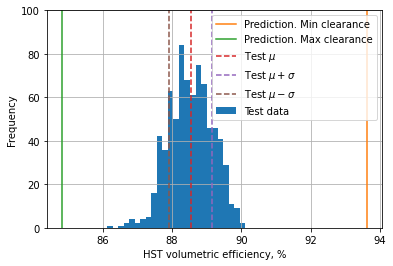

In [5]:
vol_eff.plot(kind='hist',bins=25,grid=True,label='Test data')
plt.plot([eff_max['hst']['volumetric'],eff_max['hst']['volumetric']],[0, 100],label='Prediction. Min clearance')
plt.plot([eff_min['hst']['volumetric'],eff_min['hst']['volumetric']],[0, 100],label='Prediction. Max clearance')
plt.plot([vol_eff.mean(), vol_eff.mean()],[0, 100],'--',label='Test $\mu$')
plt.plot([vol_eff.mean()+vol_eff.std(), vol_eff.mean()+vol_eff.std()],[0, 100],'--',label='Test $\mu + \sigma$')
plt.plot([vol_eff.mean()-vol_eff.std(), vol_eff.mean()-vol_eff.std()],[0, 100],'--',label='Test $\mu - \sigma$')
plt.xlabel('HST volumetric efficiency, %')
plt.ylim(0, 100)
plt.legend()